D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 4152.5083 - mae: 35.4055 - val_loss: 4309.8110 - val_mae: 35.5236
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3427.4397 - mae: 33.6909 - val_loss: 4210.5000 - val_mae: 35.2109
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3615.8032 - mae: 34.8703 - val_loss: 4079.1677 - val_mae: 34.7687
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2846.5168 - mae: 29.1706 - val_loss: 3907.6895 - val_mae: 34.1185
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3024.6956 - mae: 30.2471 - val_loss: 3658.3171 - val_mae: 33.1063
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3146.8208 - mae: 30.5440 - val_loss: 3329.5330 - val_mae: 31.6623
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2366.0933 - mae: 27.8342 - val_loss: 2895.4307 - val_mae: 29.6235
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2863.2866 - mae: 30.8667 - val_loss: 2343.0930 - val_mae: 26.7606


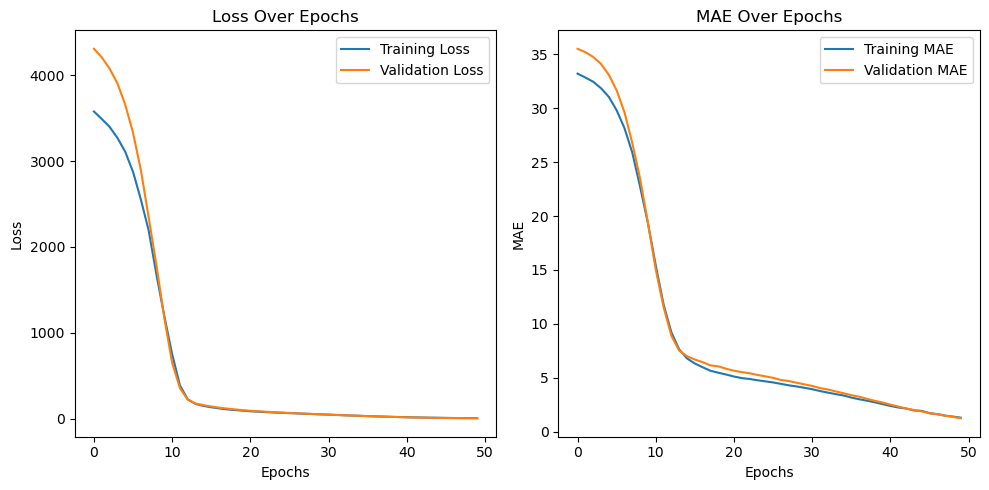

In [1]:
#First check mean square error function
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the CSV file, skipping the first three rows
def load_and_process_csv(file_path):
    df = pd.read_csv(file_path, skiprows=3)

    # Split data into calls and puts
    call_columns = ['Last Sale', 'Net', 'Bid', 'Ask', 'Volume', 'IV', 'Delta', 'Gamma', 'Open Interest']
    put_columns = call_columns.copy()

    calls = df[['Strike'] + call_columns].dropna()
    puts = df[['Strike'] + put_columns].dropna()

    return calls, puts

# Preprocess the data
def preprocess_data(data):
    X = data[['Strike', 'Last Sale', 'Net', 'Bid', 'Ask', 'Volume', 'IV', 'Delta', 'Gamma', 'Open Interest']]
    y = data['Last Sale']

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

# Build the 3-layer neural network model
def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Regression output layer
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Visualize training history
def plot_training_history(history):
    plt.figure(figsize=(10, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('MAE Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main function to train the model
def main(file_path):
    calls, puts = load_and_process_csv(file_path)

    # Process calls data
    X_calls, y_calls = preprocess_data(calls)
    X_train, X_test, y_train, y_test = train_test_split(X_calls, y_calls, test_size=0.2, random_state=42)

    # Build and train the model
    model = build_model(X_train.shape[1])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

    # Evaluate the model
    loss, mae = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss}, Test MAE: {mae}")

    # Plot training history
    plot_training_history(history)

if __name__ == "__main__":
    file_path = r"F:\inputs\options\log\spy\01_27_2025\spy_quotedata.csv"   # Replace with the actual CSV file path
    main(file_path)

Stock data sample:
                       Date       Close  Strike
0 2024-11-29 00:00:00-05:00  600.528809  600.53
1 2024-12-02 00:00:00-05:00  601.605225  601.61
2 2024-12-03 00:00:00-05:00  601.884216  601.88
3 2024-12-04 00:00:00-05:00  605.621643  605.62
4 2024-12-05 00:00:00-05:00  604.625000  604.62
Option Data Types:
Strike           float64
Last Sale        float64
Net              float64
Bid              float64
Ask              float64
Volume             int64
IV               float64
Delta            float64
Gamma            float64
Open Interest      int64
dtype: object
Stock Data Types:
Date      datetime64[ns, America/New_York]
Close                              float64
Strike                             float64
dtype: object
Before filling NaNs, merged_data shape: (593, 12)
After filling NaNs, merged_data shape: (313, 12)
Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 34.1915 - mae: 3.3951 - val_loss: 44.5570 - val_mae: 4.0289
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 38.1421 - mae: 3.3353 - val_loss: 41.1034 - val_mae: 3.7328
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 32.1682 - mae: 3.0269 - val_loss: 37.7420 - val_mae: 3.5026
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 37.2572 - mae: 3.3507 - val_loss: 33.8770 - val_mae: 3.3264
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 30.9915 - mae: 3.0036 - val_loss: 29.7379 - val_mae: 3.1298
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 21.6408 - mae: 2.3601 - val_loss: 25.1105 - val_mae: 2.8717
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.4602 - mae: 2.5735 - val_loss: 19.7437 - val_mae: 2.5325
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 18.2956 - mae: 2.3780 - val_loss: 14.2288 - val_mae: 2.1636
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.3732 - mae: 1.8

D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


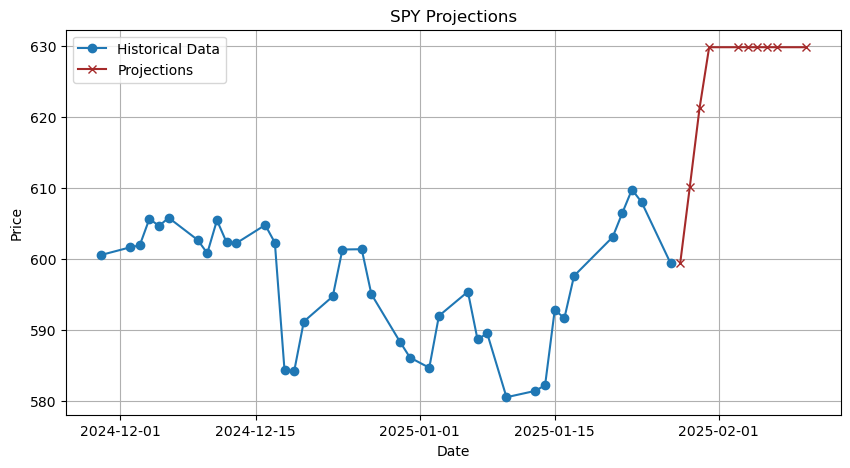

In [16]:
#Plot projection using model
#3-layer neural network
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

# Load the CSV file, skipping the first three rows
def load_and_process_csv(file_path):
    df = pd.read_csv(file_path, skiprows=3)

    # Split data into calls and puts
    call_columns = ['Last Sale', 'Net', 'Bid', 'Ask', 'Volume', 'IV', 'Delta', 'Gamma', 'Open Interest']
    put_columns = call_columns.copy()

    calls = df[['Strike'] + call_columns].dropna()
    puts = df[['Strike'] + put_columns].dropna()

    return calls, puts

# Retrieve historical stock data from Yahoo Finance
def get_stock_data(symbol):
    stock = yf.Ticker(symbol)
    hist = stock.history(period="2mo")

    # Flatten MultiIndex (if applicable)
    if isinstance(hist.columns, pd.MultiIndex):
        hist.columns = ['_'.join(col).strip() for col in hist.columns.values]  # Flatten multi-index

    # Reset index and keep necessary columns
    hist = hist[['Close']].reset_index()

    # Ensure Strike matches Option Data format
    hist['Strike'] = hist['Close'].round(2)  # Round to 2 decimals for better merging
    hist['Strike'] = hist['Strike'].astype(float)  # Ensure numeric type

    print(f"Stock data sample:\n{hist.head()}")  # Debugging print

    return hist

# Preprocess the data
def preprocess_data(data, stock_data):
    # Ensure Strike is numeric for a successful merge
    data['Strike'] = data['Strike'].astype(float)
    stock_data['Strike'] = stock_data['Strike'].astype(float)

    # Debugging: Print data types and samples
    print(f"Option Data Types:\n{data.dtypes}")
    print(f"Stock Data Types:\n{stock_data.dtypes}")

    # Use `merge_asof()` to allow closest matches
    merged_data = pd.merge_asof(
        data.sort_values("Strike"),
        stock_data.sort_values("Strike"),
        on="Strike",
        direction="nearest",  # Use the closest Strike price if no exact match exists
        tolerance=0.5  # Allows small mismatches (adjust if needed)
    )

    # Debugging: Check merge result
    print(f"Before filling NaNs, merged_data shape: {merged_data.shape}")

    # Ensure missing values are handled properly
    merged_data.ffill(inplace=True)  # Forward fill missing values
    merged_data.dropna(inplace=True)  # Remove remaining NaNs

    # Debugging: Check after filling missing values
    print(f"After filling NaNs, merged_data shape: {merged_data.shape}")

    # Define feature columns
    feature_columns = ['Strike', 'Last Sale', 'Net', 'Bid', 'Ask', 'Volume', 
                       'IV', 'Delta', 'Gamma', 'Open Interest', 'Close']

    # **Check if merged_data is empty before proceeding**
    if merged_data.empty:
        raise ValueError("Error: Merged dataset is empty after processing. Check stock_data and option data alignment.")

    X = merged_data[feature_columns]
    y = merged_data['Last Sale']

    # Normalize features (only if X has values)
    if len(X) == 0:
        raise ValueError("No valid samples available for training. Check data processing steps.")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler, feature_columns


# Build the 3-layer neural network model
def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Regression output layer
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Retrieve historical data and generate projections
def plot_projections(symbol, model, scaler, feature_columns):
    # Get historical data (last 2 months)
    stock_data = get_stock_data(symbol)

    # Prepare data for projections
    recent_data = stock_data[['Date', 'Close']].copy()
    recent_data['Strike'] = recent_data['Close']  # Use Close as a proxy for Strike

    # Ensure the feature set matches training data
    for col in feature_columns:
        if col not in recent_data.columns:
            recent_data[col] = np.nan  # Add missing columns to match the feature set

    recent_data.ffill(inplace=True)

    # Scale data using the same scaler
    features = scaler.transform(recent_data[feature_columns])

    # Use the **last row** of historical data as input (not last 10 flattened)
    last_feature = features[-1].reshape(1, -1)  # Ensure shape is (1, 11)

    # Start projections from the last known price
    projections = [recent_data['Close'].iloc[-1]]

    # Estimate historical volatility to cap unrealistic projections
    historical_volatility = np.std(np.diff(recent_data['Close']) / recent_data['Close'][:-1])

    for i in range(9):
        predicted_scaled = model.predict(last_feature)[0, 0]

        # Convert back to actual price scale
        predicted_real = scaler.inverse_transform([[predicted_scaled] + [0] * (len(feature_columns) - 1)])[0, 0]

        # Limit the projected price growth to 2x historical volatility per step
        max_change = historical_volatility * projections[-1] * 2
        predicted_real = np.clip(predicted_real, projections[-1] - max_change, projections[-1] + max_change)

        projections.append(predicted_real)

        # Update input for next prediction, ensuring correct shape
        last_feature = np.roll(last_feature, -1)  # Shift values left
        last_feature[0, -1] = scaler.transform([[predicted_real] + [0] * (len(feature_columns) - 1)])[0, 0]  # Keep shape (1, 11)

    # Create projection dates
    projection_dates = pd.date_range(recent_data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=10, freq='B')

    # Plot historical and projected data
    plt.figure(figsize=(10, 5))
    plt.plot(recent_data['Date'], recent_data['Close'], label='Historical Data', marker='o')
    plt.plot(projection_dates, projections, label='Projections', marker='x', color='brown')
    plt.title(f"{symbol.upper()} Projections")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()


# Main function to train the model
def main(file_path, symbol):
    calls, puts = load_and_process_csv(file_path)
    stock_data = get_stock_data(symbol)

    # Process calls data (Expect 4 return values now)
    X_calls, y_calls, scaler, feature_columns = preprocess_data(calls, stock_data)
    X_train, X_test, y_train, y_test = train_test_split(X_calls, y_calls, test_size=0.2, random_state=42)

    # Build and train the model
    model = build_model(X_train.shape[1])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

    # Evaluate the model
    loss, mae = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss}, Test MAE: {mae}")

    # Plot projections (Pass feature_columns to ensure consistency)
    plot_projections(symbol, model, scaler, feature_columns)


if __name__ == "__main__":
    file_path = r"F:\inputs\options\log\spy\01_27_2025\spy_quotedata.csv"  # Replace with the actual CSV file path
    symbol = "SPY"  # Replace with the stock symbol
    main(file_path, symbol)

Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 3386.0830 - mae: 31.9555 - val_loss: 4337.6533 - val_mae: 35.5706
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3965.3933 - mae: 34.4071 - val_loss: 4254.0498 - val_mae: 35.3076
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3550.6736 - mae: 33.4978 - val_loss: 4134.3618 - val_mae: 34.9129
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4145.3530 - mae: 36.5679 - val_loss: 3963.0171 - val_mae: 34.3018
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3167.6572 - mae: 32.1916 - val_loss: 3738.4846 - val_mae: 33.4121
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2653.2341 - mae: 28.3136 - val_loss: 3422.9543 - val_mae: 32.0774
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2762.6128 - mae: 29.8553 - val_loss: 2998.8999 - val_mae: 30.1865
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2626.1592 - mae: 27.8823 - val_loss: 2476.6448 - val_mae: 27.5872
Epoch 9/50
1

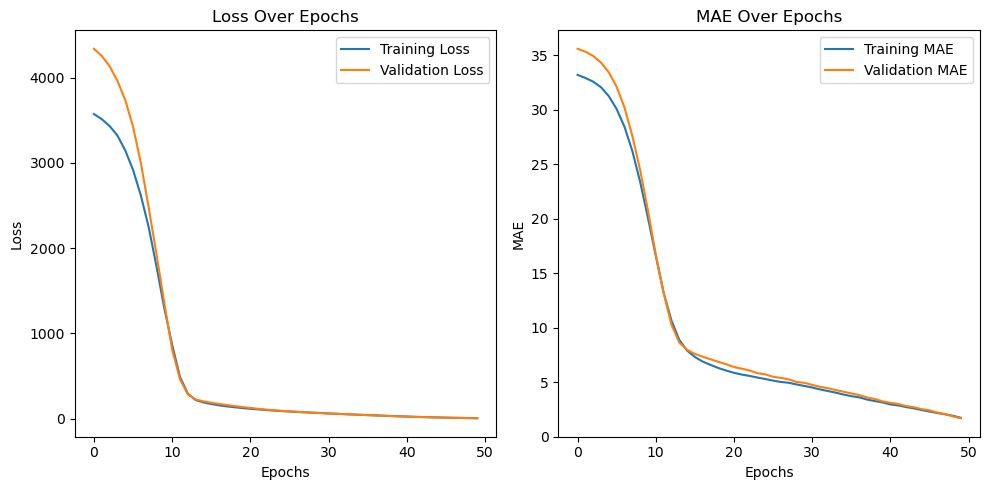

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


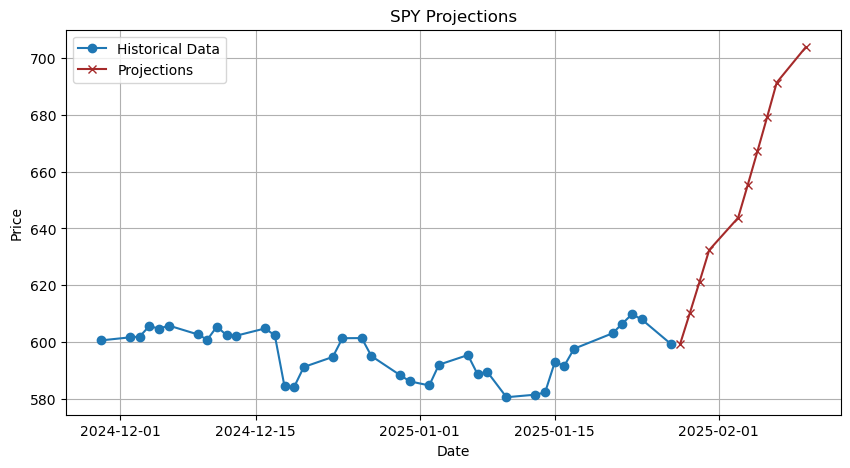

In [9]:
#Backup of 3-layer neural network
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

# Load the CSV file, skipping the first three rows
def load_and_process_csv(file_path):
    df = pd.read_csv(file_path, skiprows=3)

    # Split data into calls and puts
    call_columns = ['Last Sale', 'Net', 'Bid', 'Ask', 'Volume', 'IV', 'Delta', 'Gamma', 'Open Interest']
    put_columns = call_columns.copy()

    calls = df[['Strike'] + call_columns].dropna()
    puts = df[['Strike'] + put_columns].dropna()

    return calls, puts

# Preprocess the data
def preprocess_data(data):
    X = data[['Strike', 'Last Sale', 'Net', 'Bid', 'Ask', 'Volume', 'IV', 'Delta', 'Gamma', 'Open Interest']]
    y = data['Last Sale']

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

# Build the 3-layer neural network model
def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Regression output layer
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Visualize training history
def plot_training_history(history):
    plt.figure(figsize=(10, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('MAE Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Retrieve historical data and generate projections
# Retrieve historical data and generate projections
def plot_projections(symbol, model, scaler):
    # Get historical data (last 2 months)
    stock = yf.Ticker(symbol)
    hist = stock.history(period="2mo")

    # Prepare data for projections
    recent_data = hist[['Close']].reset_index()
    recent_data['Strike'] = recent_data['Close']  # Use Close as a proxy for Strike

    # Scale data
    features = scaler.transform(recent_data[['Strike']])

    # Use last 10 historical data points as input for prediction
    last_feature = features[-10:].reshape(1, -1)

    # Start projections from the last known price
    projections = [recent_data['Close'].iloc[-1]]

    # Estimate historical volatility to cap unrealistic projections
    historical_volatility = np.std(np.diff(recent_data['Close']) / recent_data['Close'][:-1])

    for i in range(9):
        predicted_scaled = model.predict(last_feature)[0, 0]

        # Convert back to actual price scale
        predicted_real = scaler.inverse_transform([[predicted_scaled]])[0, 0]

        # Limit the projected price growth to 2x historical volatility per step
        max_change = historical_volatility * projections[-1] * 2
        predicted_real = np.clip(predicted_real, projections[-1] - max_change, projections[-1] + max_change)

        projections.append(predicted_real)

        # Update input for next prediction, ensuring correct shape
        last_feature = np.roll(last_feature, -1)
        last_feature[0, -1] = scaler.transform([[predicted_real]])[0, 0]

    # Create projection dates
    projection_dates = pd.date_range(recent_data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=10, freq='B')

    # Plot historical and projected data
    plt.figure(figsize=(10, 5))
    plt.plot(recent_data['Date'], recent_data['Close'], label='Historical Data', marker='o')
    plt.plot(projection_dates, projections, label='Projections', marker='x', color='brown')
    plt.title(f"{symbol.upper()} Projections")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.show()


# Main function to train the model
def main(file_path, symbol):
    calls, puts = load_and_process_csv(file_path)

    # Process calls data
    X_calls, y_calls = preprocess_data(calls)
    X_train, X_test, y_train, y_test = train_test_split(X_calls, y_calls, test_size=0.2, random_state=42)

    # Build and train the model
    model = build_model(X_train.shape[1])
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

    # Evaluate the model
    loss, mae = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss}, Test MAE: {mae}")

    # Plot training history
    plot_training_history(history)

    # Plot projections
    scaler = StandardScaler().fit(calls[['Strike']])
    plot_projections(symbol, model, scaler)

if __name__ == "__main__":
    file_path = r"F:\inputs\options\log\spy\01_27_2025\spy_quotedata.csv"   # Replace with the actual CSV file path
    symbol = "SPY"  # Replace with the stock symbol
    main(file_path, symbol)
